In [172]:
import pandas as pd
import numpy as np
from datetime import datetime


In [177]:
spy = pd.read_csv("../Data/SPY.csv")
qqq = pd.read_csv("../Data/QQQ.csv")
tsla =pd.read_csv("../Data/TSLA.csv")
spxTV = pd.read_csv("../Data/SPX_TV.csv")
iwmTV = pd.read_csv("../Data/IWM_TV.csv")
djiTV = pd.read_csv("../Data/DJI_TV.csv")

In [178]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_power_trend_conditions(data, symbol):
    # Calculate EMA and SMA
    data['EMA21'] = data['Close'].ewm(span=21, adjust=False).mean()
    data['SMA50'] = data['Close'].rolling(window=50).mean()

    # Calculate lows over the last 10 days
    data['Lows10'] = data['Low'].rolling(window=10).min()

    # Find points where conditions are met
    condition1 = (data['Lows10'] > data['EMA21']) 
    condition2 = data['EMA21'] > data['SMA50']
    condition2_days = condition2.rolling(window=5).sum() >= 5
    condition3 = data['SMA50'] > data['SMA50'].shift(1)
    condition4 = data['Close'] > data['Open']

    buy_signals = data[condition1 & condition2_days & condition3 & condition4]

    # Plot the candlestick chart
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(data['Close'], label='Close', linewidth=1, color='black')

    # Plot arrow for buy signals
    ax.scatter(buy_signals.index, buy_signals['Low'], marker='^', color='g', label='Buy Signal', s=100)

    # Plot EMA and SMA
    ax.plot(data['EMA21'], label='EMA21', linestyle='--', linewidth=1, color='blue')
    ax.plot(data['SMA50'], label='SMA50', linestyle='--', linewidth=1, color='red')

    ax.set_title(f'Candlestick Chart with Power Trend Conditions - {symbol}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend()

    # Show the plot
    plt.show()

# Example usage:
# Assuming you have a DataFrame 'stock_data' with columns 'Open', 'High', 'Low', 'Close'
# and a stock symbol 'AAPL'
# plot_power_trend_conditions(stock_data, 'AAPL')


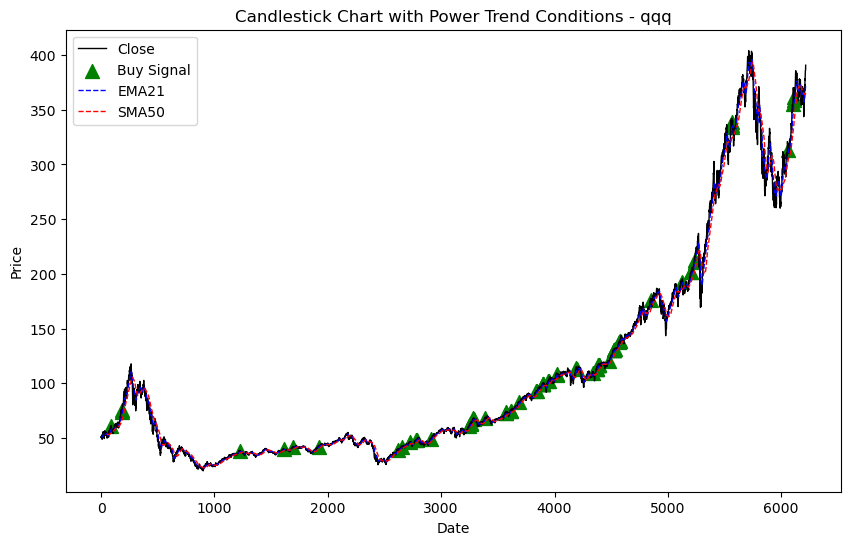

In [179]:
plot_power_trend_conditions(qqq,'qqq')

In [189]:
import pandas as pd
import matplotlib.pyplot as plt



def plot_power_trend_conditions2(data, symbol):
    # Calculate EMA and SMA
    data['EMA21'] = data['Close'].ewm(span=21, adjust=False).mean()
    data['SMA50'] = data['Close'].rolling(window=50).mean()

    # Calculate lows over the last 10 days
    data['Lows10'] = data['Low'].rolling(window=10).min()

    # Find points where conditions are met
    condition1 = (data['Lows10'] > data['EMA21']) 
    condition2 = data['EMA21'] > data['SMA50']
    condition2_days = condition2.rolling(window=5).sum() >= 5
    condition3 = data['SMA50'] > data['SMA50'].shift(1)
    condition4 = data['Close'] > data['Open']

    buy_signals = data[condition1 & condition2_days & condition3 & condition4]

    # Plot the candlestick chart
    fig, ax = plt.subplots(figsize=(14, 8))  # Increase the figure size for better spacing
    ax.plot(data['Close'], label='Close', linewidth=1, color='black')

    # Plot arrow for buy signals
    ax.scatter(buy_signals.index, buy_signals['Low'], marker='^', color='g', label='Buy Signal', s=100)

    # Plot EMA and SMA
    ax.plot(data['EMA21'], label='EMA21', linestyle='--', linewidth=1, color='blue')
    ax.plot(data['SMA50'], label='SMA50', linestyle='--', linewidth=1, color='red')

    ax.set_title(f'Candlestick Chart with Power Trend Conditions - {symbol}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend()

    # Format x-axis dates to display month and year
    date_format = data.index.strftime('%b %Y')
    
    # Set ticks at regular intervals (e.g., every 2 months)
    num_ticks = len(date_format)
    tick_interval = max(num_ticks // 25, 1)  # Adjust the divisor for desired spacing
    ax.set_xticks(data.index[::tick_interval])
    
    ax.set_xticklabels(date_format[::tick_interval], rotation=45)
    
    # Show the plot
    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()
    

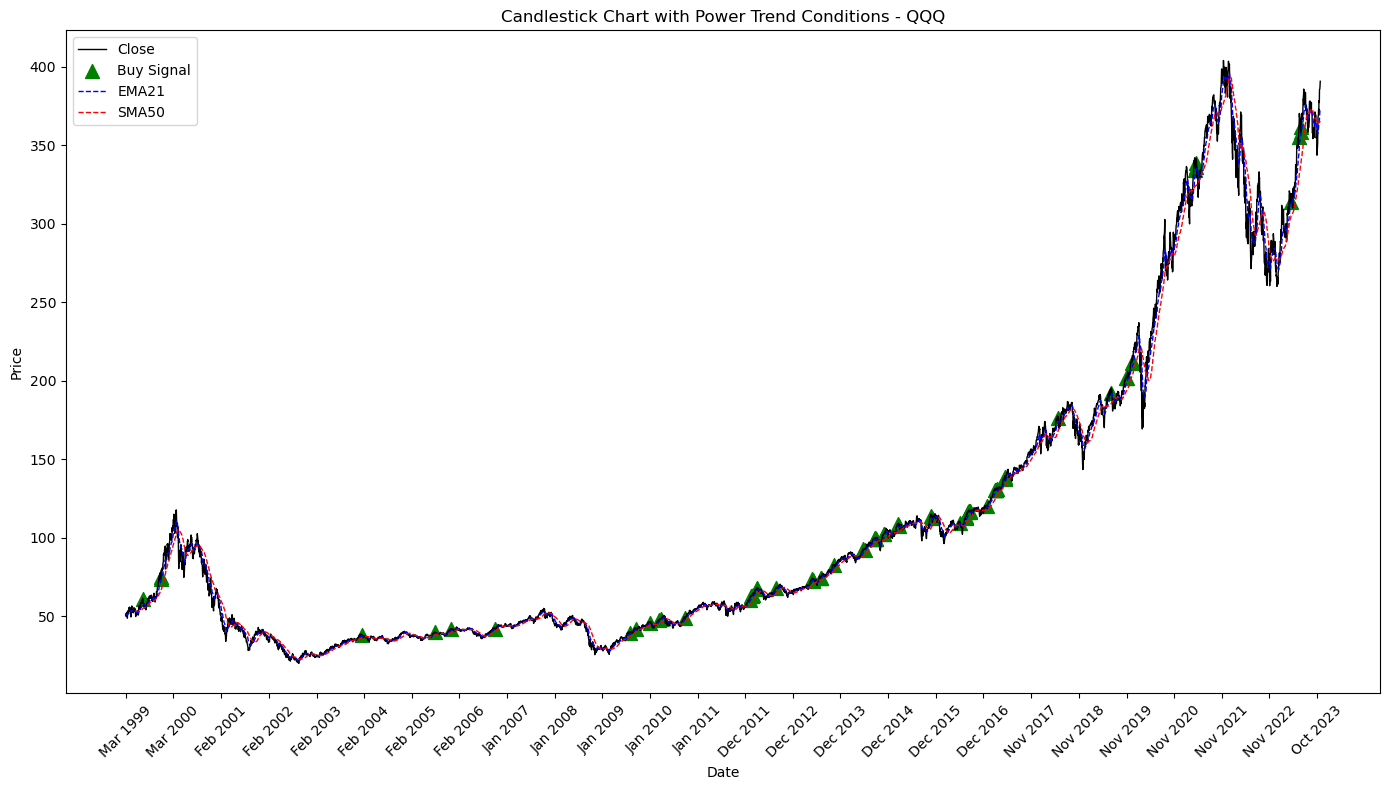

In [190]:
qqq = pd.read_csv("../Data/QQQ.csv",parse_dates=['Date'], index_col='Date')
plot_power_trend_conditions2(qqq, 'QQQ')

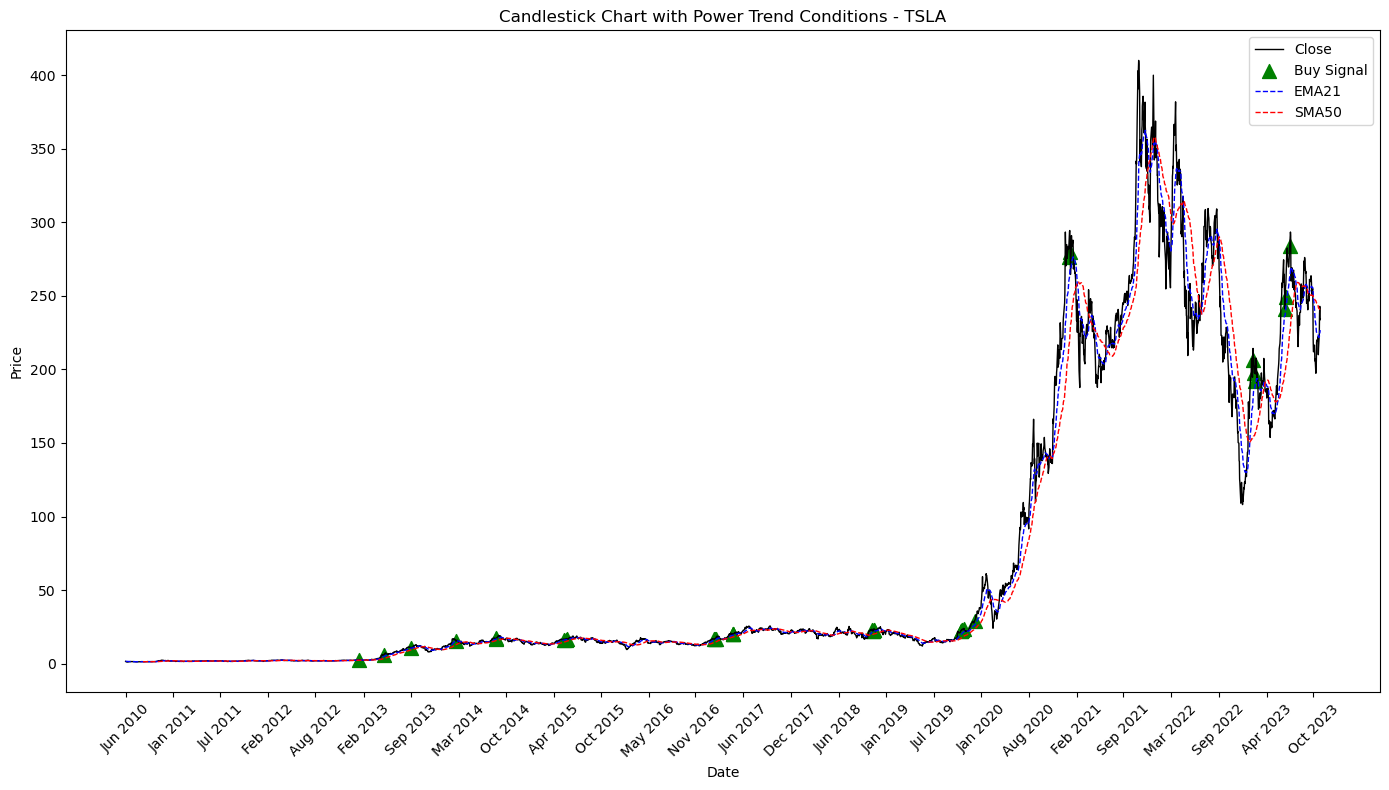

In [199]:
tsla = pd.read_csv("../Data/TSLA.csv", parse_dates=['Date'], index_col='Date')
plot_power_trend_conditions2(tsla, 'TSLA')

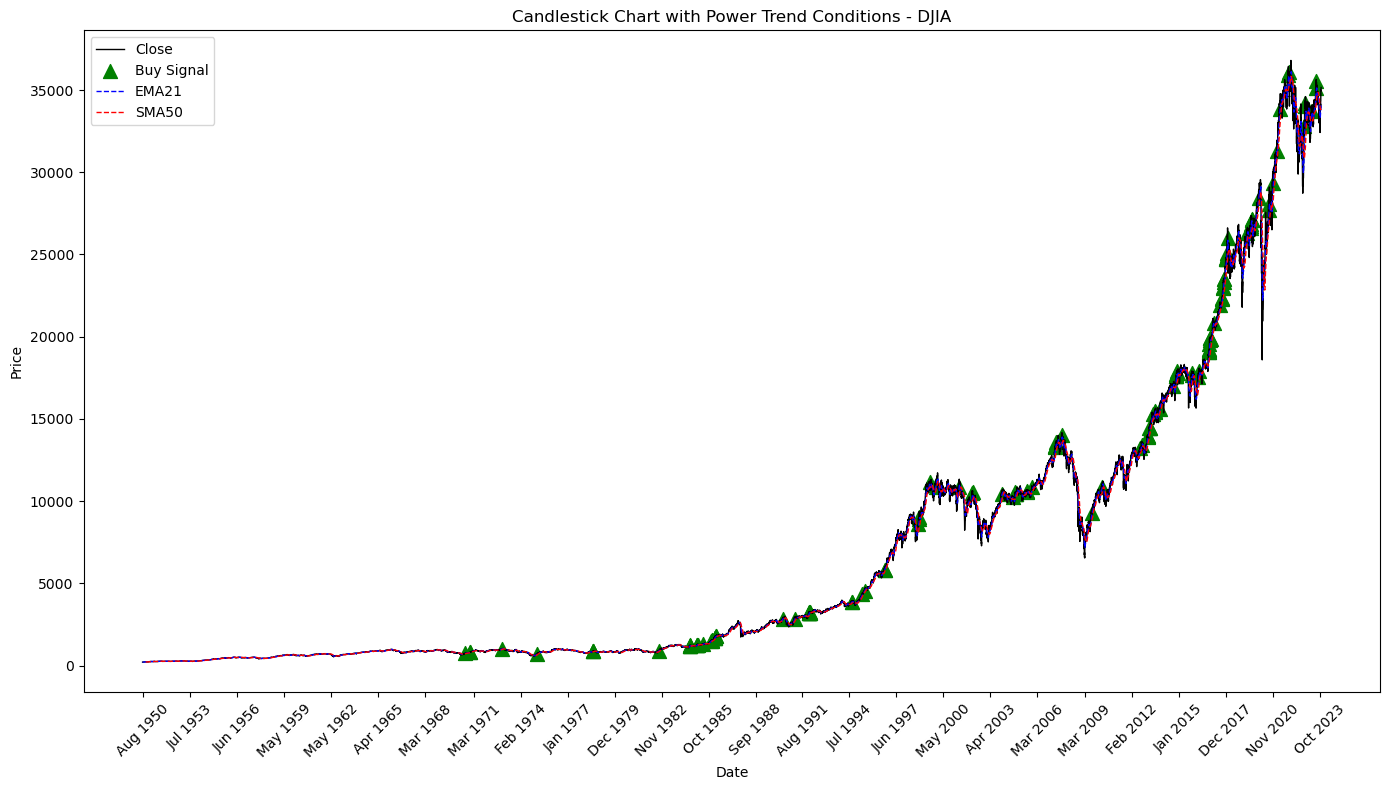

In [197]:
djiTV = pd.read_csv("../Data/DJI_TV.csv", parse_dates=['Date'], index_col='Date')
plot_power_trend_conditions2(djiTV, 'DJIA')

In [196]:
qqq

,Open,High,Low,Close,EMA21,SMA50,Lows10
Date,,,,,,,
1999-03-10,51.125000,51.156250,50.281250,51.062500,51.062500,NaN,NaN
1999-03-11,51.437500,51.734375,50.312500,51.312500,51.085227,NaN,NaN
1999-03-12,51.125000,51.156250,49.656250,50.062500,50.992252,NaN,NaN
1999-03-15,50.437500,51.562500,49.906250,51.500000,51.038411,NaN,NaN
1999-03-16,51.718750,52.156250,51.156250,51.937500,51.120146,NaN,NaN
...,...,...,...,...,...,...,...
2023-11-14,383.709991,386.260010,383.179993,385.329987,367.101998,364.440000,351.619995
2023-11-15,387.250000,387.750000,384.239990,385.619995,368.785452,364.657600,360.299988
2023-11-16,384.839996,386.190002,383.559998,385.950012,370.345866,364.935400,364.519989
